In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
# import data
btc = pd.read_csv("data/BTC_Daily.csv", na_values="?").dropna()

In [58]:
# print the first five lines
btc.head()

,Date,Symbol,Open,High,Low,Close,Volume,Index,DailyChange
0,10/5/2021,BTCUSD,49320.94,51927.83,49108.30,51305.89,1580.632545,2189,-1984.95
1,10/4/2021,BTCUSD,47509.65,49789.33,46926.68,49320.94,1755.413010,2188,-1811.29
2,10/3/2021,BTCUSD,47899.79,49259.30,47372.35,47509.65,864.795466,2187,390.14
3,10/2/2021,BTCUSD,47555.51,48346.70,47144.00,47899.79,761.864461,2186,-344.28
4,10/1/2021,BTCUSD,43628.16,48495.68,43472.59,47555.51,3254.016403,2185,-3927.35


In [59]:
# list basic info
btc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2189
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2190 non-null   object 
 1   Symbol       2190 non-null   object 
 2   Open         2190 non-null   float64
 3   High         2190 non-null   float64
 4   Low          2190 non-null   float64
 5   Close        2190 non-null   float64
 6   Volume       2190 non-null   float64
 7   Index        2190 non-null   int64  
 8   DailyChange  2190 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 171.1+ KB


In [60]:
#Index date
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.set_index(btc['Date'])
btc = btc.sort_index()

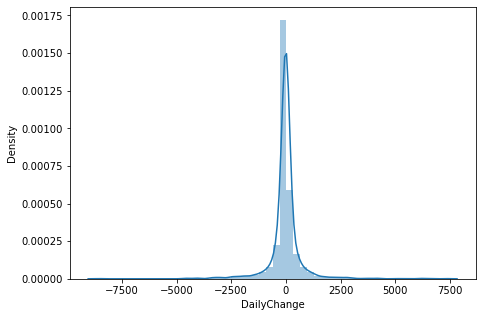

In [61]:
#Plot the distribution
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(btc['DailyChange'])
plt.show()

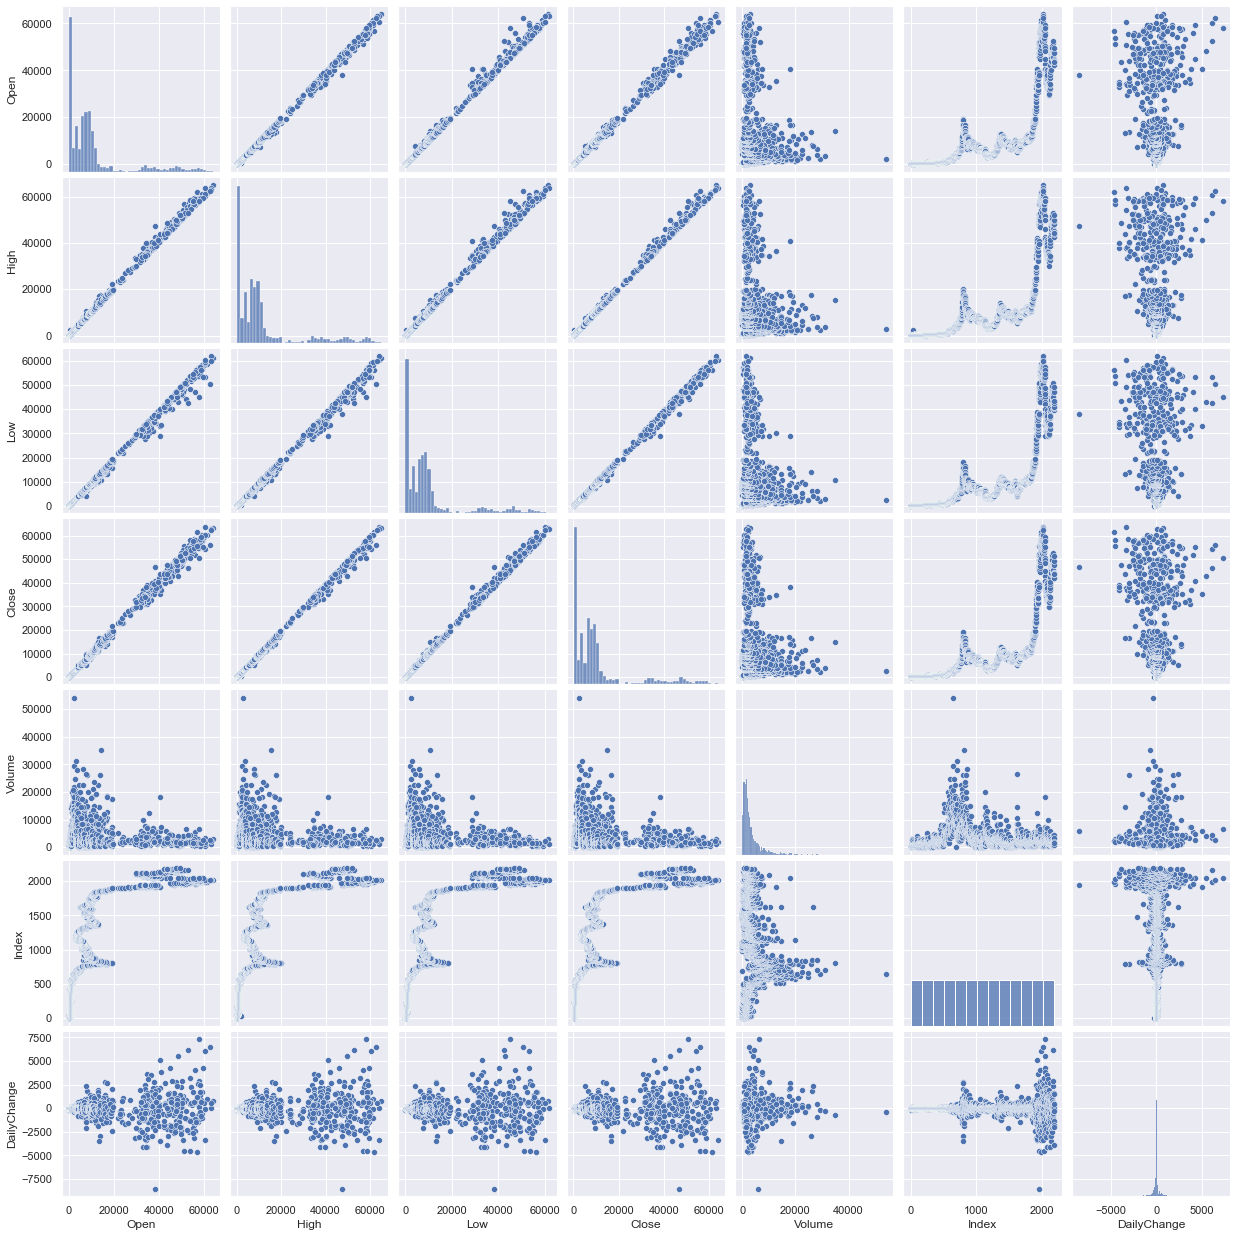

In [62]:
#scatterplot
sns.set()
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Index','DailyChange']
sns.pairplot(btc[cols], height = 2.5)
plt.show();

In [63]:
#Set boundaries for outliers
high = btc['DailyChange'].mean() + 3*btc['DailyChange'].std()
low = btc['DailyChange'].mean() - 3*btc['DailyChange'].std()
print('Highest allowed:', high)
print('Lowest allowed:', low)

Highest allowed: 2289.7366881939934
Lowest allowed: -2336.461893673445


In [64]:
#Flag the outliers
btc[(btc['DailyChange'] > high) | (btc['DailyChange'] < low)]

,Date,Symbol,Open,High,Low,Close,Volume,Index,DailyChange
Date,,,,,,,,,
2017-12-07,2017-12-07,BTCUSD,13812.76,17712.65,13799.00,16783.25,26024.938690,791,-2970.49
2017-12-09,2017-12-09,BTCUSD,15942.35,16100.00,13141.50,13200.00,9967.756954,793,2742.35
2017-12-10,2017-12-10,BTCUSD,13200.00,16984.61,13178.00,16638.88,14633.030730,794,-3438.88
2017-12-21,2017-12-21,BTCUSD,16912.07,17375.20,13111.11,14238.85,18041.670440,805,2673.22
2020-03-12,2020-03-12,BTCUSD,7656.57,7656.57,3901.25,5301.14,26579.742430,1617,2355.43
...,...,...,...,...,...,...,...,...,...
2021-09-01,2021-09-01,BTCUSD,47052.84,49935.09,46980.44,49596.74,1105.142189,2155,-2543.90
2021-09-07,2021-09-07,BTCUSD,52663.45,52744.48,42600.00,46490.38,4513.565405,2161,6173.07
2021-09-19,2021-09-19,BTCUSD,47854.23,48333.32,45175.20,45553.62,860.712331,2173,2300.61


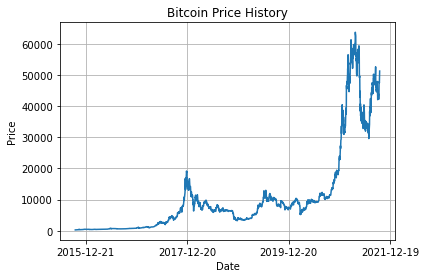

In [9]:
t = btc['Date']
s = btc['Close']

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Date', ylabel='Price',
       title='Bitcoin Price History')
ax.grid()

ax = plt.gca()

#ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(730))

plt.show()

In [10]:
avg = btc.rolling(window=7).mean()

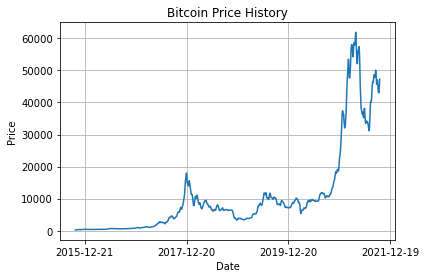

In [11]:
t = btc['Date']
s = avg['Close']

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Date', ylabel='Price',
       title='Bitcoin Price History')
ax.grid()

ax = plt.gca()

#ax.invert_xaxis()

ax.xaxis.set_major_locator(ticker.MultipleLocator(730))

plt.show()

In [74]:
#btc = btc.drop(['Date', 'Symbol'], axis=1)
DailyChange = btc(btc['DailyChange'])

TypeError: 'DataFrame' object is not callable

In [44]:
def is_outlier(DailyChange, thresh=3.5):
    """
    Returns a boolean array with True if btc are outliers and False 
    otherwise.

    Parameters:
    -----------
        btc : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(DailyChange.shape) == 1:
        DailyChange = DailyChange[:,None]
    median = np.median(DailyChange, axis=0)
    diff = np.sum((DailyChange - median)**2, axis=1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [42]:
is_outlier(DailyChange)

array([False, False, False, ..., False,  True,  True])

In [54]:
def mad_based_outlier(DailyChange, thresh=3.5):
    if len(DailyChange.shape) == 1:
        DailyChange = DailyChange[:,None]
    median = np.median(DailyChange, axis=0)
    diff = np.sum((DailyChange - median)**2, axis=1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

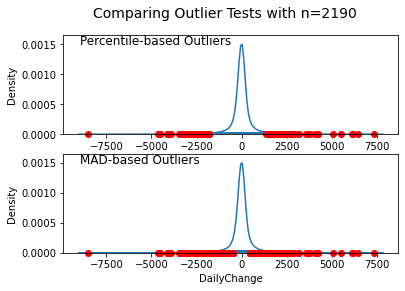

In [55]:
mad_based_outlier(DailyChange)
percentile_based_outlier(DailyChange)
plot(DailyChange)

In [79]:
xlist = ['Index', 'DailyChange']
X = btc[xlist]

In [80]:
X.values

array([[ 0.00000e+00, -2.43600e+02],
       [ 1.00000e+00, -1.91000e+00],
       [ 2.00000e+00, -7.90000e-01],
       ...,
       [ 2.18700e+03,  3.90140e+02],
       [ 2.18800e+03, -1.81129e+03],
       [ 2.18900e+03, -1.98495e+03]])

In [82]:
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest(max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X)
preds

array([-1, -1, -1, ..., -1, -1, -1])

In [17]:
# create train test partition
#train = btc['2015-10-08':'2019-10-06']
#test  = btc['2016-10-07':]
#print('Train Dataset:',train.shape)
#print('Test Dataset:',test.shape)
#X_train = btc.drop(btc['Date'])

Train Dataset: (1460, 9)
Test Dataset: (1825, 9)


In [13]:
train.head()

,Date,Symbol,Open,High,Low,Close,Volume,Index,DailyChange
Date,,,,,,,,,
2015-10-08,2015-10-08,BTCUSD,0.00,245.00,0.00,243.60,34.754703,0,-243.60
2015-10-09,2015-10-09,BTCUSD,243.60,249.97,243.60,245.51,61.587068,1,-1.91
2015-10-10,2015-10-10,BTCUSD,245.51,246.30,244.60,246.30,30.870549,2,-0.79
2015-10-11,2015-10-11,BTCUSD,246.30,249.50,245.96,248.98,22.747091,3,-2.68
2015-10-12,2015-10-12,BTCUSD,248.98,248.98,245.75,245.75,71.047743,4,3.23


In [18]:
from pyod.models.copod import COPOD
clf = COPOD()
clf.fit(X_train)

# get outlier scores
y_train_scores = clf.decision_scores_  # raw outlier scores on the train data
y_test_scores = clf.decision_function(X_test)  # predict raw outlier scores on test

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required.

In [131]:
# Generate train data
X_train = train.drop(['Date', 'Symbol', 'Open', 'Low', 'Volume', 'Index'], axis=1)
X_test = test.drop(['Date', 'Symbol', 'Open', 'Low', 'Volume', 'Index'], axis=1)

trainfeatures = X_train.columns
print(trainfeatures)

testfeatures = X_test.columns
print(testfeatures)

y_train = train['Date']
y_test = test['Date']

Index(['High', 'Close'], dtype='object')
Index(['High', 'Close'], dtype='object')


In [90]:
X_train = X_train.values
X_test = X_test.values

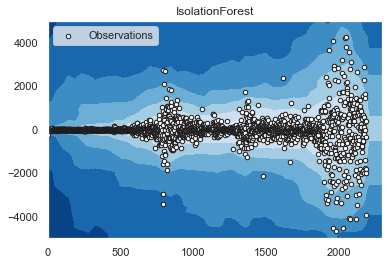

In [103]:
# Isolation Forest model
clf = IsolationForest(max_samples=2200, random_state=1)
clf.fit(X)
y_pred = clf.predict(X)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(0, 2300, 50), np.linspace(-5000, 5000, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='white',
                 s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 2300))
plt.ylim((-5000, 5000))
plt.legend([b1],
           ["Observations"],
           loc="upper left")
plt.show()

In [91]:
clf = IsolationForest(n_estimators=10, warm_start=True)
clf.fit(X)  # fit 10 trees  
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(X)  # fit the added trees

b1 = plt.scatter(X[:,1], X[:,1], c='white',
                 s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1],
           ["training observations"],
           loc="upper left")
plt.show()

TypeError: '(slice(None, None, None), 1)' is an invalid key

In [102]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = X_train
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)
np.array([ 1,  1, -1,  1])
clf.negative_outlier_factor_

array([-2.08361784, -1.22144562, -1.0064643 , ..., -2.29480892,
       -1.01646987, -1.03627979])

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')